In [23]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

*Survey Responses*

In [24]:
df_survey = pd.read_csv("../study_data/end_of_game_survey.csv")
df_survey

,participant_id,level_name,game_id,trial_id,recap,accuracy
0,669e9f5cc2490,level_A,-2,0,The AI's estimate did not change my guess in t...,4
1,669e9f5cc2490,level_A,-3,1,The AI's estimate did not change my guess in t...,3
2,669e9f5cc2490,level_A,62,2,The AI's estimate did not change my guess in t...,1
3,669e9f5cc2490,level_A,69,3,The AI's estimate did not change my guess in t...,4
4,669e9f5cc2490,level_A,55,4,The AI's estimate did not change my guess in t...,1
...,...,...,...,...,...,...
18976,66d702507b14d,level_A,92,22,I won points in this round because I changed m...,4
18977,66d702507b14d,level_A,94,23,I won points in this round because I changed m...,4
18978,66d702507b14d,level_A,74,24,The AI's estimate did not change my guess in t...,2
18979,66d702507b14d,level_A,82,25,The AI's estimate did not change my guess in t...,2


*Final Survey Responses*

In [25]:

df_final_survey = pd.read_csv("../study_data/end_of_study_survey.csv")
df_final_survey 


,participant_id,level_name,final_recap,changed_confidence,trust,accuracy
0,669e9f5cc2490,level_A,"Overall, the AI's estimates did not change my ...",0,0,2
1,669e9f5ce72ca,level_A,"Overall, the AI's estimates did not change my ...",3,1,1
2,669ea009e06f7,level_A,"Overall, the AI's estimates did not change my ...",1,2,2
3,669ea0b810826,level_A,"Overall, the AI's estimates did not change my ...",3,1,3
4,669ea0cb40e7d,level_A,"Overall, the AI's estimates changed my guess f...",1,1,3
...,...,...,...,...,...,...
698,66d0ad6a6cbeb,level_BP,"Overall, the AI's estimates did not change my ...",0,3,3
699,66d0b05a1ea55,level_BP,"Overall, the AI's estimates changed my guess f...",3,2,2
700,66d0b38c65497,level_BP,"Overall, the AI's estimates changed my guess f...",3,3,3
701,66d701ba49773,level_A,"Overall, the AI's estimates did not change my ...",1,1,1


*Demographic Responses*

In [26]:
df_demo_survey = pd.read_csv("../study_data/demo_survey.csv")
df_demo_survey

,participant_id,level_name,age,gender,degree,subjects,age_groups
0,669e9f5cc2490,level_A,46.0,Female,Graduate degree,IT and Engineering,"[40, 50]"
1,669e9f5ce72ca,level_A,28.0,Female,High School Diploma,I prefer not to say,"[18, 30]"
2,669ea009e06f7,level_A,35.0,Non-binary,Undergraduate degree,Other,"[30, 40]"
3,669ea0b810826,level_A,45.0,Female,Undergraduate degree,Social Sciences,"[40, 50]"
4,669ea0cb40e7d,level_A,25.0,Male,Graduate degree,IT and Engineering,"[18, 30]"
...,...,...,...,...,...,...,...
698,66d0ad6a6cbeb,level_BP,26.0,Male,High School Diploma,Other,"[18, 30]"
699,66d0b05a1ea55,level_BP,39.0,Female,Undergraduate degree,Other,"[30, 40]"
700,66d0b38c65497,level_BP,71.0,Male,Undergraduate degree,IT and Engineering,"[60, 100]"
701,66d701ba49773,level_A,53.0,Female,Undergraduate degree,Natural Sciences,"[50, 60]"


In [27]:
df_survey.groupby("level_name")["participant_id"].nunique()


level_name
level_A        100
level_B        102
level_BP       100
level_B_cal    302
level_C         99
Name: participant_id, dtype: int64

***Age Statistics***

In [28]:
def convert_to_float(element): 
    try:
        return float(element)
    except ValueError:
        return np.nan

df_demo_survey["age_int"]=df_demo_survey["age"].apply(lambda x: convert_to_float(x))
print("mean age: ", np.nanmean(df_demo_survey["age_int"]))
print("min age: ",np.min(df_demo_survey["age_int"]))
print("max age: ",np.max(df_demo_survey["age_int"]))


mean age:  38.44062947067239
min age:  18.0
max age:  79.0


***Gender Statistics***

In [29]:
df_demo_survey[["participant_id", "gender"]].groupby("gender").count()

,participant_id
gender,
Female,345
I prefer not to say,4
Male,346
Non-binary,8


***Filter out participants with failed the attention tests***

In [30]:
#number of participants before filtering
df_survey.groupby("level_name")["participant_id"].nunique()

level_name
level_A        100
level_B        102
level_BP       100
level_B_cal    302
level_C         99
Name: participant_id, dtype: int64

In [31]:
#read ids of filtered participants
ids = pd.read_csv("data/filtered_ids.csv")
df_survey = df_survey[~df_survey['participant_id'].isin(ids['participant_id'])]
df_final_survey = df_final_survey[~df_final_survey['participant_id'].isin(ids['participant_id'])]
df_demo_survey = df_demo_survey[~df_demo_survey['participant_id'].isin(ids['participant_id'])]

#read ids of filtered participants in the calibration data
ids_cal = pd.read_csv("data/filtered_ids_cal.csv")
df_survey = df_survey[~df_survey['participant_id'].isin(ids_cal['participant_id'])]
df_final_survey = df_final_survey[~df_final_survey['participant_id'].isin(ids_cal['participant_id'])]
df_demo_survey = df_demo_survey[~df_demo_survey['participant_id'].isin(ids_cal['participant_id'])]

In [32]:
#number of participants after filtering
df_survey.groupby("level_name")["participant_id"].nunique()

level_name
level_A         85
level_B         85
level_BP        91
level_B_cal    260
level_C         79
Name: participant_id, dtype: int64

***Set up for Figures***

In [33]:
#setup seaborn context and style
import sys
sys.path.insert(0, '../util')
import helper
sns.set_context("paper")
sns.set_theme(style="whitegrid")
helper.latexify(font_size=9, small_font_size=7)

ABCBP_palette = ["#9ce0b0","#b2c8f7","#f1b2ad" ,"#96edf1"]
ABC_palette = ["#9ce0b0","#b2c8f7","#f1b2ad"]
BBP_palette = ["#f1b2ad" ,"#96edf1"]

In [34]:
#setup matplotlib for plotting with latex and tikz 
#(needed for group symbols in plot labels)
# 
# #needed to plot for pdf
import matplotlib
plt.rcParams.update({
"pgf.texsystem":   "pdflatex",
"pgf.preamble": r"""
    \usepackage{amsmath}
    \usepackage{amssymb}
    \usepackage{tikz}
    \usepackage{makecell}
    \usepackage{xcolor,colortbl}
    \definecolor{redarrow}{HTML}{c55c41}
    \definecolor{bluearrow}{HTML}{4b869a}
    \definecolor{boxgray}{HTML}{808082}
    \definecolor{circlegray}{HTML}{606671}
    \usetikzlibrary{patterns}
    \newcommand{\stripedboxinline}[1]{%
                \tikz[baseline=(eq.base)]{
                    \node[inner sep=2pt] (eq) {$#1$};
                    \draw[pattern=north west lines, pattern color=gray!20] (eq.south west) rectangle (eq.north east);
                    \draw[gray] (eq.south west) rectangle (eq.north east);
                    \node[inner sep=2pt] (inside) {$#1$};
                        }%
                }
    \newcommand{\symbolBP}{\stripedboxinline{\color{boxgray}\textcolor{circlegray}{\bullet}\textcolor{redarrow}{\rightarrow} \textcolor{bluearrow}{\leftarrow}\textcolor{circlegray}{\bullet}}\,\textcolor{boxgray}{$\scriptstyle \text{R}$}\,}
    \newcommand{\symbolB}{$\color{boxgray}\textcolor{circlegray}{\bullet}\textcolor{redarrow}{\rightarrow} \textcolor{bluearrow}{\leftarrow}\textcolor{circlegray}{\bullet}\ $}
    \newcommand{\symbolA}{$\color{boxgray}\textcolor{bluearrow}{\leftarrow} \textcolor{circlegray}{\bullet}\,\textcolor{circlegray}{\bullet}\textcolor{redarrow}{\rightarrow}\ $}
    \newcommand{\symbolC}{$\color{boxgray} \textcolor{circlegray}{\bullet}\quad\textcolor{circlegray}{\bullet}\ $}
    """
})

#needed to plot on notebook
plt.rc('text', usetex = True)
plt.rc('text.latex', preamble=r"""
    \usepackage{tikz}
    \usepackage{xcolor,colortbl}
    \definecolor{redarrow}{HTML}{c55c41}
    %\definecolor{bluearrow}{HTML}{4b869a}
    \definecolor{bluearrow}{rgb}{0.0,0.0,1.0}
    \definecolor{boxgray}{HTML}{808082}
    \definecolor{circlegray}{HTML}{606671}
    \usetikzlibrary{patterns}
    \newcommand{\stripedboxinline}[1]{%
                \tikz[baseline=(eq.base)]{
                    \node[inner sep=2pt] (eq) {$#1$};
                    \draw[pattern=north west lines, pattern color=gray!20] (eq.south west) rectangle (eq.north east);
                    \draw[gray] (eq.south west) rectangle (eq.north east);
                    \node[inner sep=2pt] (inside) {$#1$};
                        }%
                }
    \newcommand{\symbolBP}{\stripedboxinline{\color{boxgray}\textcolor{circlegray}{\bullet}\textcolor{redarrow}{\rightarrow} \textcolor{bluearrow}{\leftarrow}\textcolor{circlegray}{\bullet}}\,\textcolor{boxgray}{$\scriptstyle R$}\,}
    \newcommand{\symbolB}{$\color{boxgray}\textcolor{circlegray}{\bullet}\textcolor{redarrow}{\rightarrow} \textcolor{bluearrow}{\leftarrow}\textcolor{circlegray}{\bullet}\ $}
    \newcommand{\symbolA}{$\color{boxgray}\color{bluearrow}{\leftarrow} \color{circlegray}{\bullet}\,\color{circlegray}{\bullet}\color{redarrow}{\rightarrow}\ $}
    \newcommand{\symbolC}{$\color{boxgray} \textcolor{circlegray}{\bullet}\quad\textcolor{circlegray}{\bullet}\ $}
    """)



matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Computer Modern'
# matplotlib.verbose.level = 'debug-annoying'

***Figure S11a -  Averaged value of the Likert Scale on End of Study Survey***

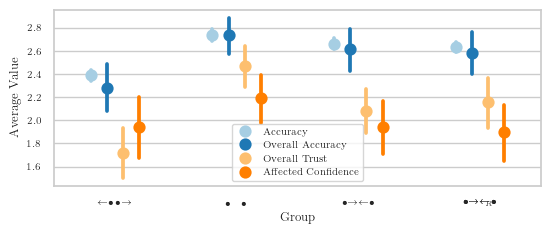

In [35]:
h,w =helper.get_fig_dim(504, 0.80)
fig, axes = plt.subplots(1,1, figsize=(h, 0.7*w))
pl=sns.color_palette("Paired", 10)
df_plot = df_final_survey.copy()
df_plot = df_plot.rename(columns={"accuracy":"overall_accuracy"})
df_plot = df_plot.melt(id_vars=["participant_id", "level_name"], value_vars=["overall_accuracy", "trust", "changed_confidence"], var_name="Metric", value_name="Average Value")
df_plot = pd.concat([df_plot, df_survey.melt(id_vars=["participant_id", "level_name"], value_vars=["accuracy"], var_name="Metric", value_name="Average Value")], ignore_index=True)
ax=sns.pointplot(x="level_name", order=["level_A","level_C","level_B","level_BP"], y="Average Value", hue="Metric", hue_order=["accuracy","overall_accuracy", "trust", "changed_confidence"], linestyles="none", data=df_plot, errorbar=('ci', 95), ax=axes, dodge=0.4, palette=pl[:2]+pl[6:8])

ax.set_xticklabels([r"\symbolA",r"\symbolC", r"\symbolB", r"\symbolBP"],)
ax.set_xlabel('Group')


legend=ax.legend()
for vpack in legend._legend_handle_box.get_children():
    for hpack in vpack.get_children():
        draw_area, text_area = hpack.get_children()
        for collection in text_area.get_children():
            if collection.get_text()=="accuracy":
                text_area.set_text("Accuracy")
            if collection.get_text()=="overall_accuracy":
                text_area.set_text("Overall Accuracy")
            if collection.get_text()=="trust":
                text_area.set_text("Overall Trust")
            if collection.get_text()=="changed_confidence":
                text_area.set_text("Affected Confidence")

fig.tight_layout()
fig.savefig("./figures/app_final_metrics.pdf", bbox_inches='tight', dpi=300, backend='pgf')

plt.show()

***Figure S11b - Frequency of statement selected by participants to best apply to their whole game experience at the end of study survey***

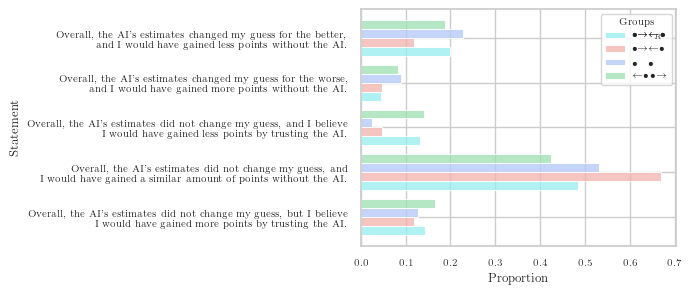

In [36]:
h,w =helper.get_fig_dim(504, 1.0)
fig = plt.figure(figsize=(h, 0.7*w))

statement_order = ['Overall, the AI\'s estimates changed my guess for the better, and I would have gained less points without the AI.', 
          'Overall, the AI\'s estimates changed my guess for the worse, and I would have gained more points without the AI.',
          'Overall, the AI\'s estimates did not change my guess, and I believe I would have gained less points by trusting the AI.',
          'Overall, the AI\'s estimates did not change my guess, and I would have gained a similar amount of points without the AI.',
          'Overall, the AI\'s estimates did not change my guess, but I believe I would have gained more points by trusting the AI.']
df_final_survey["final_recap"] = pd.Categorical(df_final_survey["final_recap"], statement_order)

ax= sns.histplot(y="final_recap", hue="level_name", data=df_final_survey, stat="proportion",common_norm=False, hue_order=["level_A","level_C","level_B","level_BP"],multiple="dodge", shrink=.8, palette=ABCBP_palette)

labels = ['Overall, the AI\'s estimates changed my guess for the better, \n and I would have gained less points without the AI.', 
          'Overall, the AI\'s estimates changed my guess for the worse, \n and I would have gained more points without the AI.',
          'Overall, the AI\'s estimates did not change my guess, and I believe \n I would have gained less points by trusting the AI.',
          'Overall, the AI\'s estimates did not change my guess, and \n I would have gained a similar amount of points without the AI.',
          'Overall, the AI\'s estimates did not change my guess, but I believe \n I would have gained more points by trusting the AI.']
ax.set_yticklabels(labels)


custom_labels = [r"\symbolBP",r"\symbolB",r"\symbolC",r"\symbolA"]
plt.legend(title='Groups', loc='upper right', labels=custom_labels)
ax.set_ylabel("Statement")

fig.tight_layout()
fig.savefig("./figures/app_hist_final.pdf", bbox_inches='tight', dpi=300, backend='pgf')
plt.show()

***Figure S11c - Frequency of statement selected by participants to best apply to their game experience at the end of game survey***

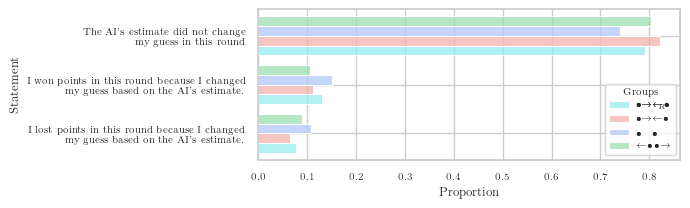

In [37]:
h,w =helper.get_fig_dim(504, 1.0)
fig = plt.figure(figsize=(h, 0.5*w))

df_plot = df_survey[["participant_id","level_name","recap"]].groupby(["level_name","recap"])["participant_id"].count().reset_index(name="count")
ax= sns.histplot(y="recap", hue="level_name", data=df_survey, stat="proportion",common_norm=False, hue_order=["level_A","level_C","level_B","level_BP"],multiple="dodge", shrink=.8, palette=ABCBP_palette)

labels = ['The AI\'s estimate did not change \n my guess in this round', 
          'I won points in this round because I changed \n my guess based on the AI\'s estimate.',
          'I lost points in this round because I changed \n my guess based on the AI\'s estimate.']
ax.set_yticklabels(labels)
ax.set_ylabel("Statement")
custom_labels = [r"\symbolBP",r"\symbolB",r"\symbolC",r"\symbolA"]
plt.legend(title='Groups', loc='lower right', labels=custom_labels)

fig.tight_layout()
fig.savefig("./figures/app_hist.pdf", bbox_inches='tight', dpi=300, backend='pgf')

plt.show()

***Figure S12 (Appendix) - Demographic Information***

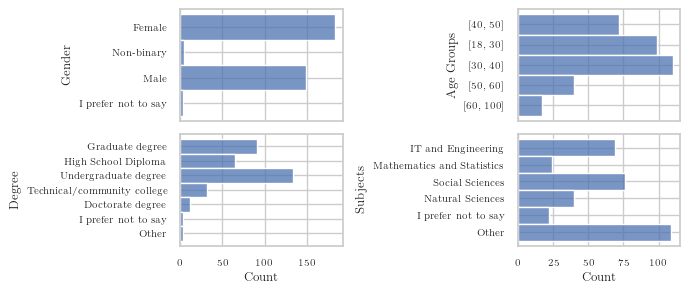

In [38]:
h,w =helper.get_fig_dim(504, 1.0)
fig, axes = plt.subplots(2,2,sharex="col", figsize=(h, 0.7*w))

df_demo_survey["subjects"] = pd.Categorical(df_demo_survey["subjects"], ['IT and Engineering', 'Mathematics and Statistics',
       'Social Sciences', 'Natural Sciences',
       'I prefer not to say', 'Other'])

for i, group in enumerate(['gender','age_groups', 'degree', 'subjects']):
    ax = axes[i//2][i%2]
    sns.histplot(data=df_demo_survey[df_demo_survey["level_name"]!="level_B_cal"], y=group, ax=ax)

axes[0][0].set_ylabel("Gender")
axes[0][1].set_ylabel("Age Groups")
axes[1][0].set_ylabel("Degree")
axes[1][1].set_ylabel("Subjects")
plt.tight_layout()
# fig


fig.tight_layout()
fig.savefig("./figures/app_demo_hist.pdf", bbox_inches='tight', dpi=300, backend='pgf')

plt.show()